### Explortory Data Analysis Part 1

I want to set up the proper imports so I have access to the Pandas, Matplotlib, and MySQL Connector Python libraries


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection
from sklearn.linear_model import LinearRegression


I want to use MySQL Connector to establish a connection to my remote data source


In [45]:
myremotedb=connection.connect(host="devcodecamp-mysql.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com", database="salesdb", user="root", password="D3v$tudent",use_pure="True")
select_query="Select * from sales"
remote_df= pd.read_sql_query(select_query,myremotedb)
remote_df.head()

C:\Users\rac\AppData\Local\Temp\ipykernel_20620\2575498146.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  remote_df= pd.read_sql_query(select_query,myremotedb)


,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City_ID
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,1
1,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9,3
2,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,3
3,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,3
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6,1


 I want to query my database to JOIN the information from the sales and cities tables together, and save the result as a single DataFrame variable.


In [46]:
joinedquery = """SELECT * FROM sales JOIN cities ON sales.City_ID= cities.City_ID"""

joined_df= pd.read_sql(joinedquery, myremotedb)
joined_df.head()

C:\Users\rac\AppData\Local\Temp\ipykernel_20620\1086496350.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  joined_df= pd.read_sql(joinedquery, myremotedb)


,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City_ID,City_ID,City
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,1,1,Seattle
1,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9,3,3,Milwaukee
2,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,3,3,Milwaukee
3,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,3,3,Milwaukee
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6,1,1,Seattle


I want to perform the necessary data cleaning and wrangling steps for my DataFrame.  This will include:
Exploring the information of the joined DataFrame
Checking for and removing null values, if necessary
Checking for and removing duplicate rows, if necessary
Converting any necessary columns to Pandas DateTime format


In [47]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     1000 non-null   object 
 1   Customer_Type  1000 non-null   object 
 2   Gender         1000 non-null   object 
 3   Product_Line   1000 non-null   object 
 4   Unit_Price     1000 non-null   float64
 5   Quantity       1000 non-null   int64  
 6   Sales_Tax      0 non-null      object 
 7   Total          1000 non-null   float64
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  COGS           1000 non-null   float64
 12  Gross_Income   1000 non-null   float64
 13  Rating         1000 non-null   float64
 14  City_ID        1000 non-null   int64  
 15  City_ID        1000 non-null   int64  
 16  City           1000 non-null   object 
dtypes: float64(5), int64(3), object(9)
memory usage: 132.

Checking for Duplicates

In [48]:
joined_df.duplicated().sort_values()
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     1000 non-null   object 
 1   Customer_Type  1000 non-null   object 
 2   Gender         1000 non-null   object 
 3   Product_Line   1000 non-null   object 
 4   Unit_Price     1000 non-null   float64
 5   Quantity       1000 non-null   int64  
 6   Sales_Tax      0 non-null      object 
 7   Total          1000 non-null   float64
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  COGS           1000 non-null   float64
 12  Gross_Income   1000 non-null   float64
 13  Rating         1000 non-null   float64
 14  City_ID        1000 non-null   int64  
 15  City_ID        1000 non-null   int64  
 16  City           1000 non-null   object 
dtypes: float64(5), int64(3), object(9)
memory usage: 132.

Converting date column.

In [49]:
joined_df["Date"]=pd.to_datetime(joined_df["Date"])

joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice_ID     1000 non-null   object        
 1   Customer_Type  1000 non-null   object        
 2   Gender         1000 non-null   object        
 3   Product_Line   1000 non-null   object        
 4   Unit_Price     1000 non-null   float64       
 5   Quantity       1000 non-null   int64         
 6   Sales_Tax      0 non-null      object        
 7   Total          1000 non-null   float64       
 8   Date           1000 non-null   datetime64[ns]
 9   Time           1000 non-null   object        
 10  Payment        1000 non-null   object        
 11  COGS           1000 non-null   float64       
 12  Gross_Income   1000 non-null   float64       
 13  Rating         1000 non-null   float64       
 14  City_ID        1000 non-null   int64         
 15  City_ID        1000 no

Removing Null

I want to explore my DataFrame to examine the spread of values across categories.  I will utilize this exploration to answer the following questions:
How many sales were made for members vs. normal customers? 501 vs 499.

How many sales were made at each store location? 340 in Settle, 332 in New York City, 328 Milwaukee.

How many sales were made for each product line? Food and beverage 174, health and beauty 152, sports and travel 166, fashion accessories 178, home and lifestyle 160, electronic accessories 170.

What is the overall average rating, based on all sales records? 6.97270



I want to create three visualizations of my DataFrame to better understand any trends or patterns within my data set.  These charts will be a type of my choosing, and I can select which variables to analyze.  All three charts should contain the following:
A chart title
X-axis labels, if applicable
Y-axis labels, if applicable


Text(0, 0.5, 'Quanity Sold')

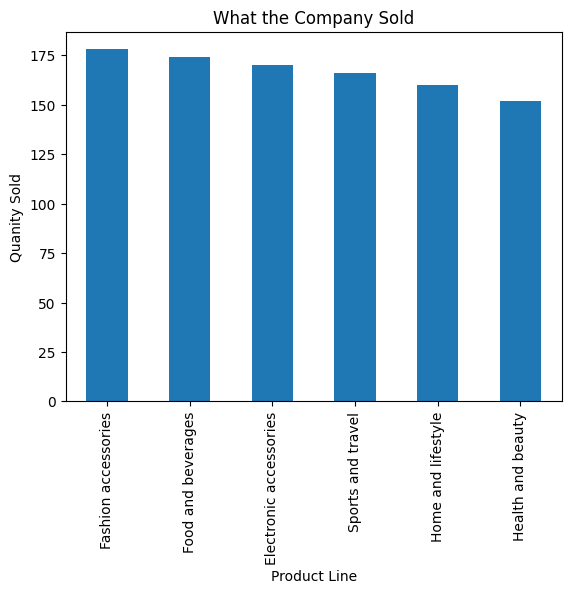

In [50]:
item_value_counts=joined_df["Product_Line"].value_counts()

item_value_counts.plot(kind="bar")

plt.title("What the Company Sold")
plt.xlabel("Product Line")
plt.ylabel("Quanity Sold")

Text(0, 0.5, '')

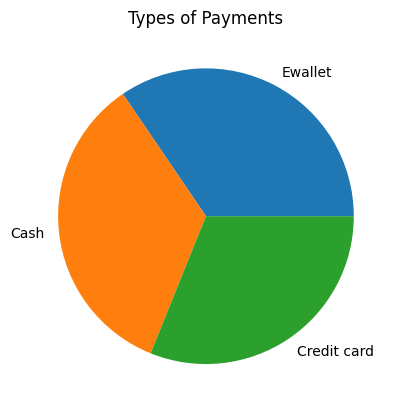

In [51]:
payment_types=joined_df["Payment"].value_counts()
payment_types.plot.pie();
plt.title("Types of Payments")
plt.ylabel("")

Text(0.5, 0, 'Cities')

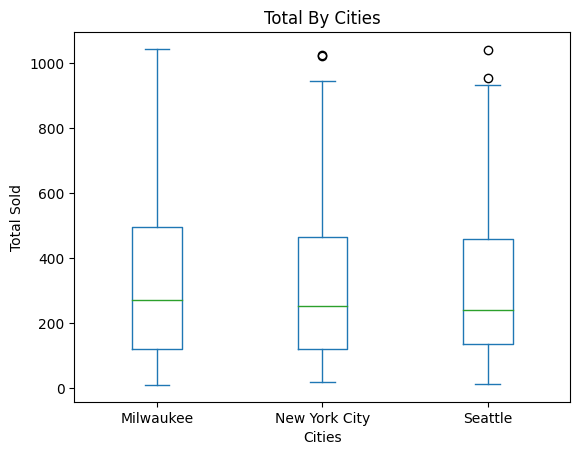

In [52]:
joined_df.plot.box(column="Total",by= "City")
plt.title("Total By Cities")
plt.ylabel("Total Sold")
plt.xlabel("Cities")

Start of Part 2

 I want to describe numeric trends in my DataFrame, using the appropriate Pandas function


In [53]:
joined_df.describe()

,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating,City_ID,City_ID
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,55.672130,5.510000,322.966749,307.58738,15.379369,6.97270,1.988000,1.988000
std,26.494628,2.923431,245.885335,234.17651,11.708825,1.71858,0.817633,0.817633
min,10.080000,1.000000,10.678500,10.17000,0.508500,4.00000,1.000000,1.000000
25%,32.875000,3.000000,124.422375,118.49750,5.924875,5.50000,1.000000,1.000000
50%,55.230000,5.000000,253.848000,241.76000,12.088000,7.00000,2.000000,2.000000
75%,77.935000,8.000000,471.350250,448.90500,22.445250,8.50000,3.000000,3.000000
max,99.960000,10.000000,1042.650000,993.00000,49.650000,10.00000,3.000000,3.000000


 I want to explore the correlation between columns of my data set, using the appropriate Pandas function

In [54]:
joined_df.corr()

C:\Users\rac\AppData\Local\Temp\ipykernel_20620\828153247.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  joined_df.corr()


,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating,City_ID,City_ID
Unit_Price,1.000000,0.010778,0.633962,0.633962,0.633962,-0.008778,0.028202,0.028202
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,-0.015815,0.015964,0.015964
Total,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,0.041047,0.041047
COGS,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,0.041047,0.041047
Gross_Income,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,0.041047,0.041047
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,1.000000,0.010238,0.010238
City_ID,0.028202,0.015964,0.041047,0.041047,0.041047,0.010238,1.000000,1.000000
City_ID,0.028202,0.015964,0.041047,0.041047,0.041047,0.010238,1.000000,1.000000


 I want to note the columns with the strongest correlation, and visualize those two columns using a Matplotlib Scatter Plot

Text(0.5, 1.0, 'Correlation')

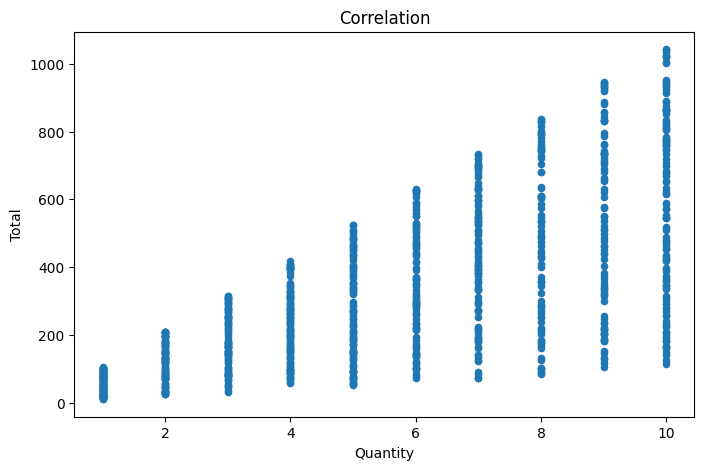

In [69]:
joined_df.plot.scatter(x="Quantity", y="Total", figsize= (8,5))
plt.title("Correlation")

In [63]:
reshaped_x=joined_df[["Quantity"]]
reshaped_y=joined_df["Total"]

In [65]:
model= LinearRegression()
model.fit(reshaped_x, reshaped_y)

predicted_y_value=model.predict(reshaped_x)

Text(0.5, 1.0, 'Correlation with Linear Regression')

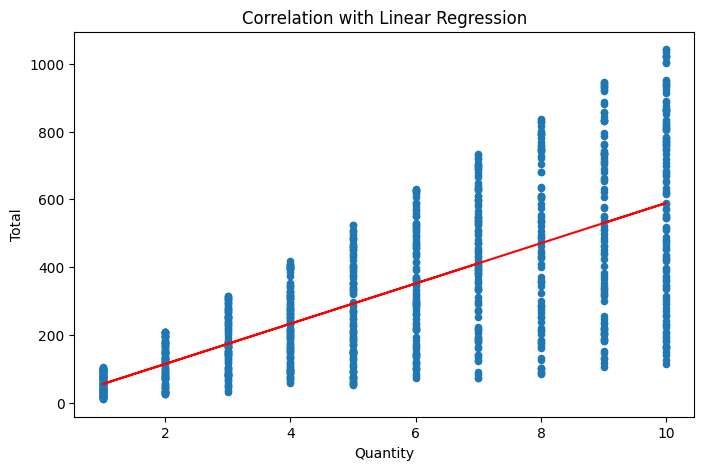

In [70]:
joined_df.plot.scatter(x="Quantity", y="Total", figsize= (8,5))

plt.plot(reshaped_x, predicted_y_value, color="red")

plt.title("Correlation with Linear Regression")